信号量
简介: 信号量是操作系统管理的一种抽象数据类型, 用于在多线程中同步对共享资源的使用. 本质上说, 信号量是一个内部数据, 用于标明当前的共享资源可以有多少并发读取.

threading模块中的信号量Semaphore对象. 其有两个操作函数, 即acquire()和release().  

每当线程想要读取关联了信号量的共享资源时,必须调用acquire(), 此操作减少信号量的内部变量, 如果此变量的值非负, 那么分配该资源的权限. 如果是负值, 那么线程被挂起, 直到有其他的线程释放资源.   

当线程不再需要该共享资源, 必须通过release()释放. 这样, 信号量的内部变量增加, 在信号量等待队列中排在最前面的线程会拿到共享资源的权限.

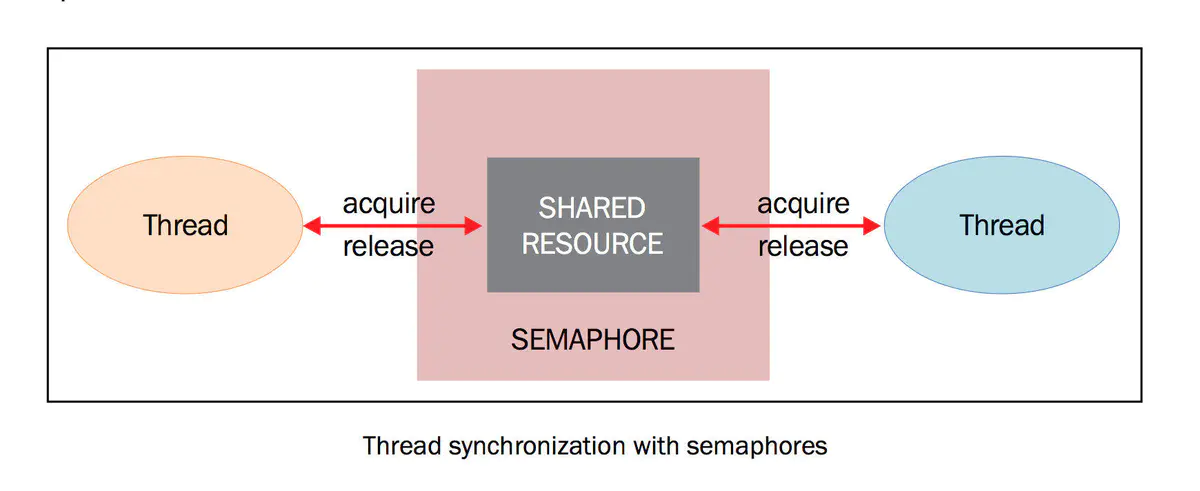

信号量代码示例(生产者消费者):

In [1]:
# -*- coding: utf-8 -*-
import threading
import time
import random


semaphore = threading.Semaphore(value=0)


def consumer():
    print("consumer is waiting")
    semaphore.acquire()
    print("Consumer notify: consumerd item number {}".format(item))


def producer():
    global item
    time.sleep(2)
    item = random.randint(0, 1000)
    print("producer notify: produced item number {}".format(item))
    semaphore.release()


if __name__ == '__main__':
    for i in range(5):
        t1 = threading.Thread(target=producer)
        t2 = threading.Thread(target=consumer)
        t1.start()
        t2.start()
        t1.join()
        t2.join()
    print("program done")

consumer is waiting
producer notify: produced item number 117
Consumer notify: consumerd item number 117
consumer is waiting
producer notify: produced item number 93
Consumer notify: consumerd item number 93
consumer is waiting
producer notify: produced item number 890
Consumer notify: consumerd item number 890
consumer is waiting
producer notify: produced item number 255
Consumer notify: consumerd item number 255
consumer is waiting
producer notify: produced item number 141
Consumer notify: consumerd item number 141
program done


死锁情况：  

例如, 当一个线程t1先等待读取信号量s1, 然后等待释放信号量s2, 而线程t2会先等待读取信号量s2, 然后等待释放信号量s1, 这样就会发生死锁. 导致t1等待t2释放信号量s1, 但t2等待t1释放信号量s2.

作者：老苏GO
链接：https://www.jianshu.com/p/90d571c41895
来源：简书
著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。